In [85]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
df = pd.read_csv("sportbysportfinal.csv").dropna(how="all", axis=1).dropna(how="all")
df

,House,Year,TOTAL,Football Fall,Soccer Fall,Frisbee Fall,Tennis Fall,VBFA,VBFBC,VBFBP,...,WCB,River Run Spring,Kickball,Billiards,W Handball,C Handball,Meetings,Fencing,Inner Tube,Forfeit points returned
0,Mather,2019.0,1251.00,0.0,85.0,110.00,59.0,110.00,0.0,100.0,...,0.00,0.0,0.0,0.0,0.0,0.0,18.0,0.0,27.0,0.0
1,Kirkland,2019.0,1123.00,0.0,115.0,80.00,38.0,85.00,0.0,100.0,...,0.00,0.0,0.0,0.0,0.0,0.0,14.0,0.0,37.0,0.0
2,Lowell,2019.0,926.00,0.0,110.0,90.00,51.0,75.00,0.0,100.0,...,0.00,0.0,0.0,0.0,0.0,0.0,16.0,0.0,27.0,0.0
3,Currier,2019.0,885.00,0.0,80.0,35.00,42.0,130.00,0.0,100.0,...,0.00,0.0,0.0,0.0,0.0,0.0,17.0,0.0,27.0,0.0
4,Pforzheimer,2019.0,836.00,0.0,95.0,85.00,0.0,60.00,0.0,100.0,...,0.00,0.0,0.0,0.0,0.0,0.0,18.0,0.0,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Lowell,2012.0,814.83,39.0,74.0,37.00,14.0,34.00,51.0,0.0,...,0.00,19.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
100,Mather,2012.0,648.18,15.0,37.6,90.67,29.0,13.66,34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,2.0,24.0,0.0,0.0
101,Pforzheimer,2012.0,818.18,25.0,38.6,54.75,-10.0,34.00,35.0,0.0,...,20.25,22.0,-5.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
102,Quincy,2012.0,646.60,35.5,33.6,22.75,33.0,18.66,18.0,0.0,...,0.00,11.0,-5.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0


Mather
Kirkland
Lowell
Currier
Pforzheimer
Quincy
Dunster
Cabot
Adams
Eliot
Winthrop
Leverett
Dudley


Text(0.5, 0, 'Year')

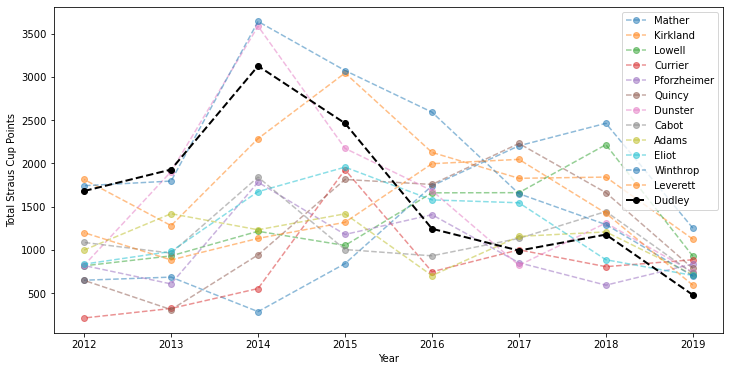

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
for house in df["House"].dropna().unique():
    d = df[df["House"] == house]
    if house == np.nan:
        print("ehre")
        continue
    print(house)
    if house == "Dudley":
        plt.plot("Year", "TOTAL", "o--", label=house, linewidth=2, color="k", data=d)
    else:
        plt.plot("Year", "TOTAL", "o--", label=house, data=d, alpha=0.5)
plt.legend()
plt.ylabel("Total Straus Cup Points")
plt.xlabel("Year")
# df = pd.read_csv('sportbysportfinal.csv', index_col=0)

## What sports did dudley participate in

In [84]:
d_sports = ~(df[df["House"] == "Dudley"].iloc[:, 3:].sum(axis=0) == 0)
d_sports = df[df["House"] == "Dudley"].iloc[:, 3:].columns[d_sports]

In [139]:
year = 2018
house = "Dudley"


def rank_summary(house):
    """
    returns
    -------
    ranks : dict
        keys of the sport
    all_ranks : list
        the positional ranking for all sports particpated in
    """
    ranks = defaultdict(list)
    print(house)
    for sport in d_sports:
        if sport in ["Meetings", "BBForfeits"]:
            # skip things that arnen't sports
            continue

        for y in df["Year"].unique():
            #         sport = "Frisbee Fall"
            y_idx = df["Year"] == y
            d = df[["House", sport]][y_idx]
            scores = d.sort_values(sport, ascending=False)
            if np.std(scores[sport]) == 0:
                # no one played
                continue
            if scores[scores["House"] == house][sport].values == 0:
                # assume 0 points -> not participating
                continue
            ranks[sport].append(
                (y, (scores["House"] == house).argmax() + 1)
            )  # plus one to account for zero indexed
        ranks[sport] = np.array(ranks[sport], dtype=np.int)
    all_ranks = []
    for k, v in ranks.items():
        try:
            all_ranks += [*v[:, 1]]
        except:
            print(k)
            print(v)
    return ranks, all_ranks


dudley_ranks, d_results = rank_summary("Dudley")

rankings = {}
all_ranks = {}
for house in df["House"].unique():
    rankings[house], all_ranks[house] = rank_summary(house)

Dudley
Mather
Relay
[]
Kirkland
Lowell
Fencing
[]
Currier
Relay
[]
Pforzheimer
Fencing
[]
Quincy
Relay
[]
Fencing
[]
Dunster
Cabot
Kickball
[]
Fencing
[]
Adams
Kickball
[]
Eliot
Relay
[]
Swim Meet
[]
Winthrop
Leverett
Dudley


In [145]:
names = []
means = []
stds = []
for k, v in all_ranks.items():
    names.append(k)
    means.append(np.mean(v))
    stds.append(np.std(v))

Text(0, 0.5, 'Sport Ranking')

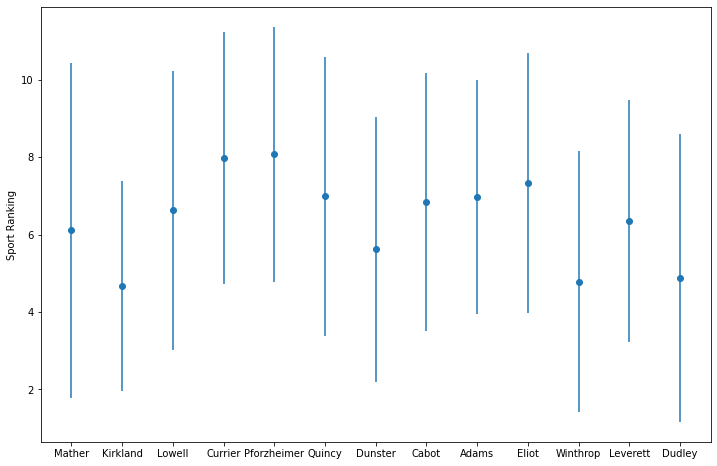

In [149]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
plt.errorbar(names, means, fmt="o", yerr=stds)
plt.ylabel("Sport Ranking")

In [129]:
import seaborn as sns

In [256]:
sns.swarmplot(data=all_ranks)

KeyError: 0

In [257]:
sns.swarmplot(x=0, y=all_ranks["Dudley"])

AttributeError: 'bool' object has no attribute 'all'

In [153]:
tips = sns.load_dataset("tips")

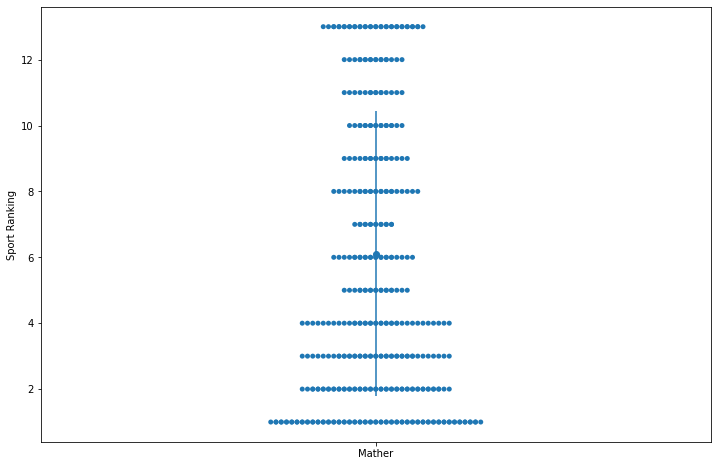

In [162]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.errorbar(names, means, fmt="o", yerr=stds)
plt.ylabel("Sport Ranking")
for house in ["Dudley", "Mather"]:
    sns.swarmplot(x=[house] * len(all_ranks[house]), y=all_ranks[house], ax=ax)
# sns.swarmplot(x=np.array(['heck']*len(all_ranks['Mather'])),y=all_ranks['Mather'],ax=ax)

In [261]:
sns.swarmplot(data=all_ranks)

KeyError: 0

                    0         1         2         3    4         5    6    7
Observation                                                                 
0            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0
1            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0
2            0.207384  0.199197  0.243867  0.256594  0.0  0.270340  0.0  0.0
3            0.275256  0.199197  0.217048  0.256594  0.0  0.270340  0.0  0.0
4            0.275256  0.199197  0.217828  0.256594  0.0  0.270340  0.0  0.0
5            0.275256  0.199197  0.217828  0.256594  0.0  0.270340  0.0  0.0
6            0.275256  0.199197  0.217828  0.256594  0.0  0.269138  0.0  0.0
7            0.275256  0.199197  0.217828  0.256594  0.0  0.269138  0.0  0.0
   Observation  level_1         0
0            0        0  0.000000
1            0        1  0.000000
2            0        2  0.000000
3            0        3  0.000000
4            0        4  0.000000
..         ...      ...   

/home/ian/anaconda3/envs/scratch/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


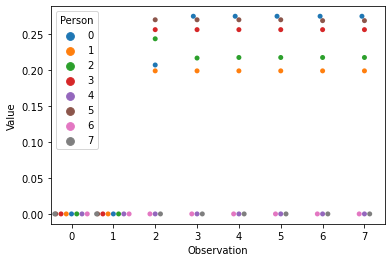

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

comp = {
    "0": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    "1": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    "2": [
        0.2073837448663338,
        0.19919737000568305,
        0.24386659105843467,
        0.25659375810265855,
        0.0,
        0.2703400161511446,
        0.0,
        0.0,
    ],
    "3": [
        0.2752555116304319,
        0.19919737000568305,
        0.21704752129294347,
        0.25659375810265855,
        0.0,
        0.2703400161511446,
        0.0,
        0.0,
    ],
    "4": [
        0.2752555116304319,
        0.19919737000568305,
        0.21782751590851177,
        0.25659375810265855,
        0.0,
        0.2703400161511446,
        0.0,
        0.0,
    ],
    "5": [
        0.2752555116304319,
        0.19919737000568305,
        0.21782751590851177,
        0.25659375810265855,
        0.0,
        0.2703400161511446,
        0.0,
        0.0,
    ],
    "6": [
        0.2752555116304319,
        0.19919737000568305,
        0.21782751590851177,
        0.25659375810265855,
        0.0,
        0.2691379068024452,
        0.0,
        0.0,
    ],
    "7": [
        0.2752555116304319,
        0.19919737000568305,
        0.21782751590851177,
        0.25659375810265855,
        0.0,
        0.2691379068024452,
        0.0,
        0.0,
    ],
}

df = pd.DataFrame.from_dict(comp, orient="index")
df.index.rename("Observation", inplace=True)

stacked = df.stack().reset_index()
print(stacked)
stacked.rename(columns={"level_1": "Person", 0: "Value"}, inplace=True)

sns.swarmplot(data=stacked, x="Observation", y="Value", hue="Person")
plt.show()

/home/ian/anaconda3/envs/scratch/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ian/anaconda3/envs/scratch/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


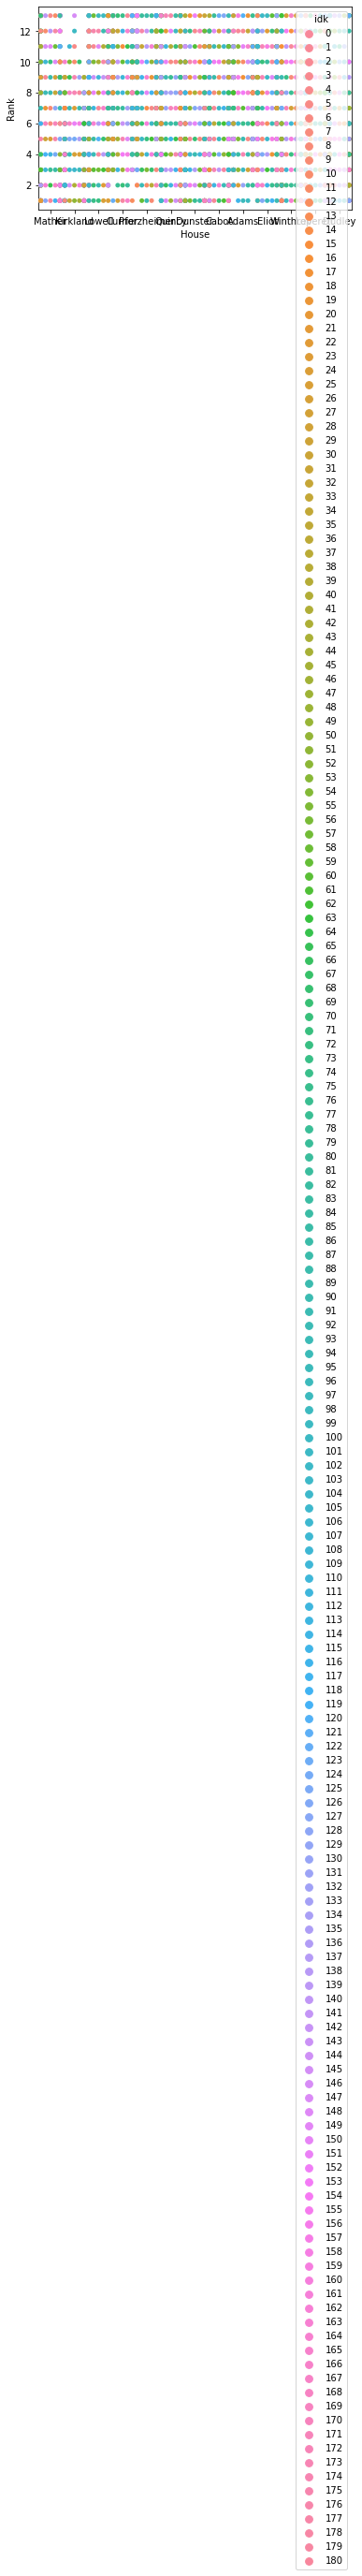

In [264]:
# plt.subplots(figsize=(10,10))
# plt.subplots(figsize=(10,10))
plt.subplots()
df = pd.DataFrame.from_dict(all_ranks, orient="index").dropna(axis=1)
df.index.rename("House", inplace=True)
stacked = df.stack().reset_index()
stacked.rename(columns={"level_1": "idk", 0: "Rank"}, inplace=True)
sns.swarmplot(data=stacked, x="House", y="Rank", hue="idk")
# plt.legend
# sns.stripplot(data=stacked, x='House', y='Rank',color='k', alpha=.05)
plt.savefig("halp.png")

(array([39., 29., 29., 29., 13., 16.,  8.,  7.,  5.,  7.,  3.,  6., 17.]),
 array([ 1.        ,  1.92307692,  2.84615385,  3.76923077,  4.69230769,
         5.61538462,  6.53846154,  7.46153846,  8.38461538,  9.30769231,
        10.23076923, 11.15384615, 12.07692308, 13.        ]),
 <BarContainer object of 13 artists>)

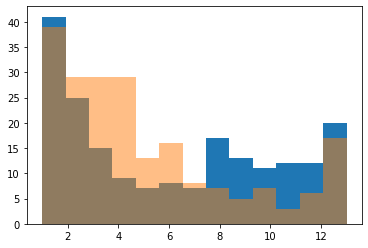

In [194]:
plt.hist(all_ranks["Mather"], bins=13)
plt.hist(all_ranks["Dudley"], bins=13, alpha=0.5)

In [196]:
np.unique(all_ranks["Dudley"], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([39, 29, 29, 29, 13, 16,  8,  7,  5,  7,  3,  6, 17]))

In [197]:
np.unique(all_ranks["Mather"], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([41, 25, 15,  9,  7,  8,  7, 17, 13, 11, 12, 12, 20]))

In [206]:
ns = sorted(all_ranks.keys())
ns.remove("Dudley")
names = ["Dudley"] + ns

In [209]:
res = np.zeros((13, 13))
for i, name in enumerate(names):
    res[i, :] = np.unique(all_ranks[name], return_counts=True)[1]

In [245]:
normed = res / res.sum(axis=0, keepdims=True)

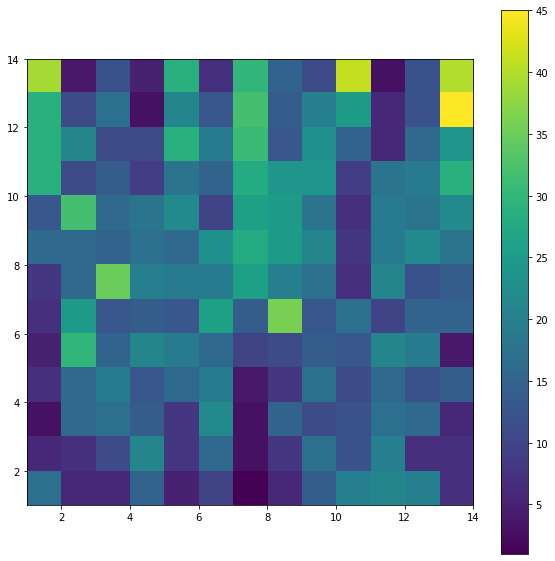

In [223]:
plt.subplots(figsize=(10, 10))
plt.imshow(res.T, extent=[1, 14, 1, 14])
plt.colorbar()

In [253]:
def matrix_plot(data, intcast=False):
    fig, ax = plt.subplots(figsize=(10, 10))

    ax._sci(ax.imshow(data.T))
    for i in range(13):
        for j in range(13):
            c = data[j, i]
            if intcast:
                c = np.int(c)
            else:
                c = np.round(c, 2)
            ax.text(i, j, str(c), va="center", ha="center")
    xticks = ax.get_xticklabels()
    ax.set_xticks(np.arange(13))
    ax.set_xticklabels(names, rotation=45)
    ax.set_yticks(np.arange(13))
    ax.set_yticklabels(np.arange(13) + 1)
    plt.ylabel("Rank")
    plt.colorbar()

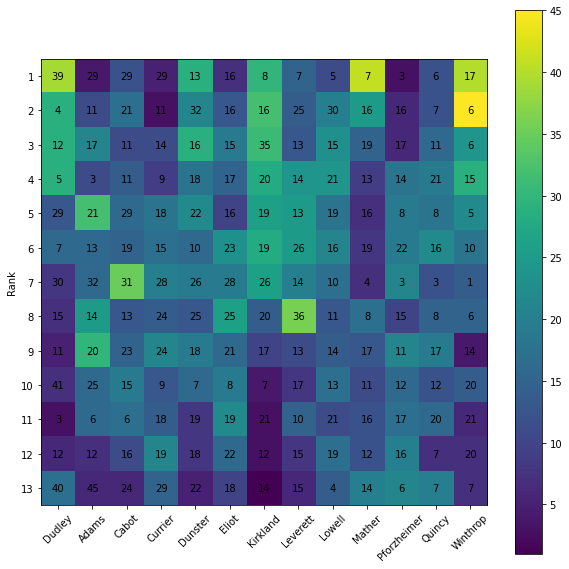

In [254]:
matrix_plot(res, True)

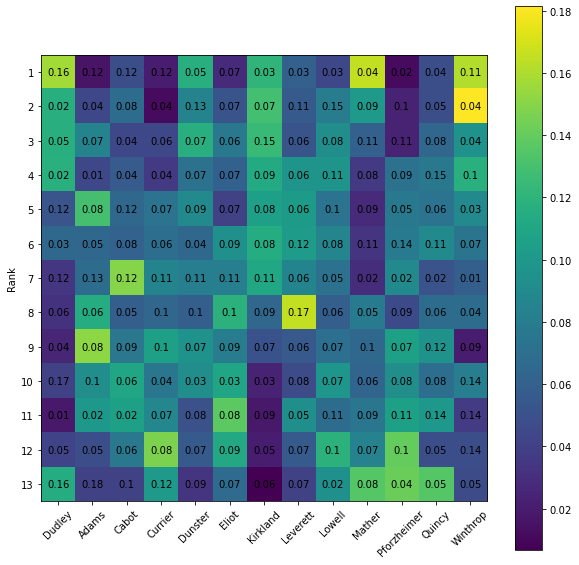

In [255]:
matrix_plot(normed)